<a href="https://colab.research.google.com/github/samrudh18/Reinforcement-Learning/blob/main/CS698R-Assignment-1-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Multi-armed Bandits

### Two-Armed Bernoulli Bandit

In [ ]:
import gym
from gym import spaces
import numpy as np

class two_armed_bandit(gym.Env):

  def __init__(self,alpha=0.7,beta=0.7):
    self.action_space = spaces.Discrete(2)
    self.observation_space = spaces.Discrete(2+1)
    self.alpha=alpha
    self.beta=beta
    self.state=0
    self.reward=None

  def step(self, action):
    
    self.action=action
    if action==0:
      #with probability alpha reach 1, with probability (1-alpha) reach 2
      self.state=np.random.binomial(n=1, p=1-self.alpha, size=None)+1
    elif action==1:
      #with probability beta reach 2, with probability (1-beta) reach 1
      self.state=np.random.binomial(n=1, p=self.beta, size=None)+1
    else:
      print('Incorrect action')
      return

    
    if self.state==2 and action==1:
      self.reward=1
    elif self.state==1 and action==0:
      self.reward=1
    else:
      self.reward=0  

    done = True
    info = {}

    return self.state, self.reward, done, info
    
  def reset(self):
    # Reset the state of the environment to an initial state
    self.state = 0
    return self.state

  def seed(self,seed=31):
    self.seed=np.random.seed(seed)

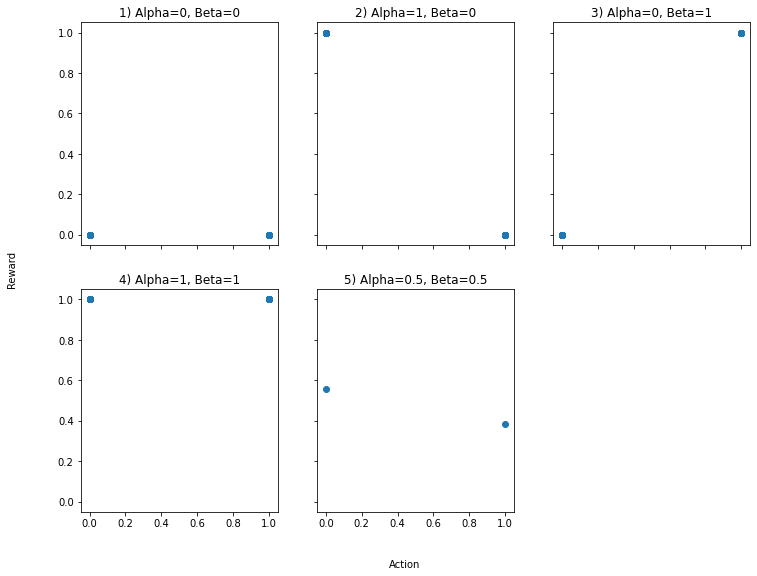

In [ ]:
params = [(0,0),(1,0),(0,1),(1,1),(0.5,0.5)]
results=[]
n=100 #number of episodes

for (alpha,beta) in params:
  env=two_armed_bandit(alpha=alpha,beta=beta)
  env.seed()
  for _ in range(n):
      action=np.random.choice([0,1])    
      s_, reward, done, info = env.step(action)
      results.append([action,reward])
      if done:
        env.reset()   
results=np.array(results)

import matplotlib.pyplot as plt

fig,axs=plt.subplots(2,3,figsize=(12,9),sharex=True,sharey=True)

for i in range(2):
  for j in range(3):

    low=(i*3*n)+j*n
    high=low+n
    x=results[:,0][low:high]
    y=results[:,1][low:high]

    if i==1 and j==2:
      continue

    if i==1 and j==1:
      axs[i][j].plot([0,1],[y[x==0].mean(),y[x==1].mean()],'o')  #since the outcome is probabilistic, mean of the y-values is plotted here

    else:
      axs[i][j].plot(x,y,'o')

    idx=(i*3)+j
    alpha,beta=params[idx]
    axs[i][j].set_title(f'{idx+1}) Alpha={alpha}, Beta={beta}')

fig.delaxes(axs[1][2])

fig.text(0.5, 0.04, 'Action', ha='center')
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical')

plt.draw()

1) Since alpha=0 and beta=0, the agent will always end up going in the opposite direction of the proposed action. Therefore, action 0 will take the agent to 2 and give no reward (reward=0) and action 1 will the agent to 1 and give no reward.

2) Since alpha=1 and beta=0, the agent will always end up at state 1. This is because probability of going towards 2 is dependent on (1-alpha) and beta which are both 0. Therefore action 0 will end up with reward=1 and action 1 will end up with no reward. 

3) Since alpha=0 and beta=1, the agent will always end up at state 2. This is because probability of going to state 1 is dependent on alpha and (1-beta) which are both 0. Therefore action 1 will end up with reward=1 and action 0 will end up with no reward. 

4) Since alpha=1 and beta=1, the agent will always end up going towards the direction of the proposed action. Therefore both actions 0 and 1 will always have a reward=1.

5) Since alpha=0.5 and beta=0.5, there is an equal proability of landing at states 1 and 2 irrespective of what action is taken. Therefore, the expected long term reward will be 0.5 for each action.


### 10-Armed Gaussian Bandit

In [ ]:
import gym
from gym import spaces
import numpy as np

class ten_armed_bandit(gym.Env):

  def __init__(self, mu=0.0,sigma=1.0):
    self.action_space = spaces.Discrete(10)
    self.observation_space = spaces.Discrete(10+1)
    self.state=0
    self.reward_dist=np.random.normal(loc=mu, scale=sigma, size=10)
    self.optimal_action=np.argmax(self.reward_dist)

  def step(self, action):
    # Execute one time step within the environment
    
    self.action=action
    self.state=action+1
    self.reward=np.random.normal(loc=self.reward_dist[self.action], scale=1.0, size=1)[0]
    done = True
    info = {'Reward distribution':self.reward_dist}

    return self.state, self.reward, done, info
    
  def reset(self):
    # Reset the state of the environment to an initial state
    state = 0
    return state

  def seed(self,seed=31):
    self.seed=np.random.seed(seed)
    
  def render(self, mode='human', close=False):
    # Render the environment to the screen
    print(f'Current state={self.state} Reward={self.reward} Action={self.action}')

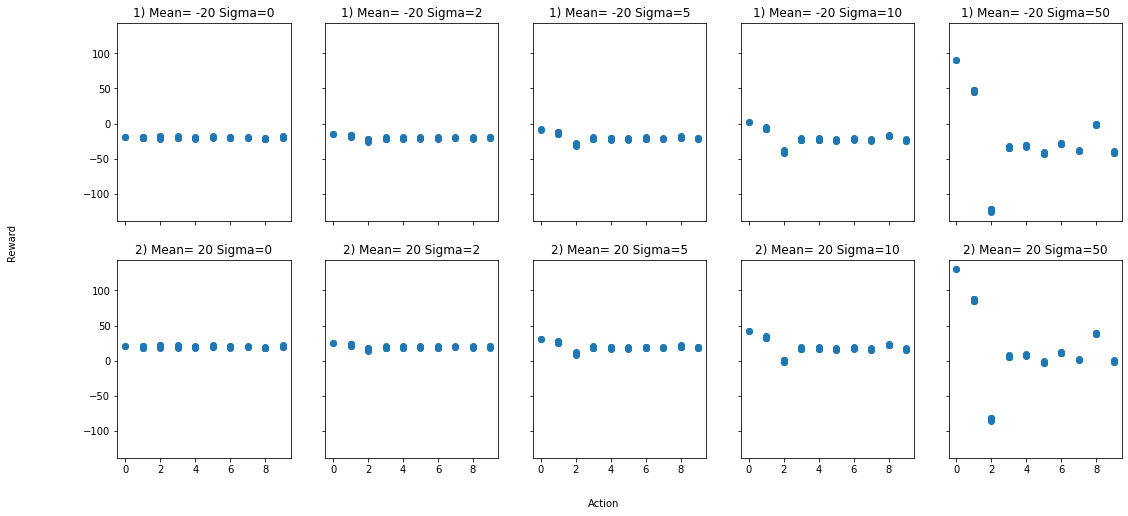

In [ ]:
sigmas = [0,2,5,10,50]
means= [-20,20]
results=[]
n=50 #number of episodes

for mean in means:
  for sigma in sigmas:
    env=ten_armed_bandit(mu=mean,sigma=sigma)
    env.seed()
    for _ in range(n):
        action=np.random.choice(np.arange(0,10))    
        s_, reward, done, info = env.step(action)
      #  env.render()
        results.append([action,reward])
        if done:
          env.reset()   
results=np.array(results)

import matplotlib.pyplot as plt

fig,axs=plt.subplots(2,5,figsize=(18,8),sharex=True,sharey=True)

for i in range(2):
  for j in range(5):

    low=(i*5*n)+j*n
    high=low+n
    x=results[:,0][low:high]
    y=results[:,1][low:high]

    axs[i][j].plot(x,y,'o')

    axs[i][j].set_title(f'{i+1}) Mean= {means[i]} Sigma={sigmas[j]}')

fig.text(0.5, 0.04, 'Action', ha='center')
fig.text(0.04, 0.5, 'Reward', va='center', rotation='vertical')

plt.show()

By increasing sigma values, the variance in the reward also increases. This is because the reward distribution for each of the k terminal states is dependent on the total reward distrubtion q* (k).  
By changing the mean values of the reward distribution q* (k), the average reward received from each terminal state also increases and decreases accordingly.

### Exploration and Exploitation strategies

#### Pure Exploitation (Greedy) strategy

In [ ]:
import numpy as np

def greedy_strategy(arms,alpha=0.7,beta=0.7,mu=0.0,sigma=1.0,maxEpisodes=5):

  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)

  elif arms==10:
     env=ten_armed_bandit(mu=mu,sigma=sigma)

  env.seed()
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  e = 0
  Q_est=np.zeros((maxEpisodes,env.action_space.n))
  results=[]

  while e < maxEpisodes:
    a = np.argmax(Q)
    s_, R, done, info = env.step(a)
    N[a] = N[a]+1
    Q[a] = Q[a]+ ((R-Q[a])/N[a])
    Q_est[e] = Q
    results.append([a,s_,R])
    e = e + 1
    if done:
      env.reset()

  if arms==10:
    total_results=np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes))
  else:
    total_results=np.hstack((results,Q_est))
    
  return total_results

In [ ]:
import pandas as pd

total_results=greedy_strategy(arms=2)
df = pd.DataFrame(total_results, columns =['Action','New State','Reward','Q-value(action 0)','Q-value(action 1)'])
df

,Action,New State,Reward,Q-value(action 0),Q-value(action 1)
0,0.0,1.0,1.0,1.000000,0.0
1,0.0,2.0,0.0,0.500000,0.0
2,0.0,2.0,0.0,0.333333,0.0
3,0.0,2.0,0.0,0.250000,0.0
4,0.0,1.0,1.0,0.400000,0.0


The agent initially took an action towards 0, reached state 1 and received reward=1. Therefore the Q value for the 0th action is 1. After the positive Q-value updation for action 0, since the agent is taking the argmax of the Q-values, the agent is now bound to take action 0 until the Q-value for the action becomes equal to or lesser than the Q-value for action 2.

The agent then repeats the action but due to the stochasiticity in the environment reaches state 2 and receives no reward. Therefore the Q value for action 0 is updated to 0.5 (sum of rewards=1/number of episodes=2).
In the third episode, the agent's action and outcome is repeated again and the Q-value for action 0 is updated to 1/3. 
The fourth episode has the same pattern of action and outcome and the Q-value for action 0 is updated to 1/4. 
In the final episode, the agent takes action 0 and reaches state 1 and receives reward=1. The Q-value for action 0 is now updated to 2/5.

We can see that the Q_values of the agent [0.4,0] are far away from the actual expected Q-values [0.7,0.7]. The greedy strategy is therefore suboptimal and the Q-values will not converge to the true values in many situations.

#### Pure Exploration strategy

In [ ]:
import numpy as np

def random_strategy(arms,alpha=0.7,beta=0.7,mu=0.0,sigma=1.0,maxEpisodes=5):

  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)

  elif arms==10:
     env=ten_armed_bandit(mu=mu,sigma=sigma)

  env.seed()
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  e = 0
  Q_est=np.zeros((maxEpisodes,env.action_space.n))
  results=[]

  while e < maxEpisodes:
    if arms==2:
      a = np.random.choice([0,1])
    elif arms==10:
      a=np.random.choice(np.arange(0,10))
    s_, R, done, info = env.step(a)
    N[a] = N[a]+1
    Q[a] = Q[a]+ ((R-Q[a])/N[a])
    Q_est[e] = Q
    results.append([a,s_,R])
    e = e + 1
    if done:
      env.reset()
  
  if arms==10:
    total_results=np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes))
  else:
    total_results=np.hstack((results,Q_est))
    
  return total_results

In [ ]:
total_results=random_strategy(arms=2)
df = pd.DataFrame(total_results, columns =['Action','New State','Reward','Q-value(action 0)','Q-value(action 1)'])
df

,Action,New State,Reward,Q-value(action 0),Q-value(action 1)
0,0.0,1.0,1.0,1.000000,0.0
1,0.0,2.0,0.0,0.500000,0.0
2,0.0,1.0,1.0,0.666667,0.0
3,1.0,2.0,1.0,0.666667,1.0
4,0.0,2.0,0.0,0.500000,1.0


The agent initially chooses action 1 and reaches state 1 and receives reward=1. Therefore, the q-value is updated to 1 for the action. The agent then repeats the same action by chance and due to the transition probabilities, reaches state 2 and receives a reward=0. The Q-value for action 1 is now updated to  0.5 (sum of rewards=1/number of episodes=2). The agent then selects action 0 randomly, reaches state 1 and receives reward=1. The Q-value for action 1 is now updated to 2/3. The agent then chooses action 1 randomly and reaches state 2 and receieves reward=1. The Q-value for action 1 is now updated to 1 (sum of rewards=1/num of episodes=1). The agent then chooses action 0 randomly and reaches state 2 with no reward. The Q-value for action 0 is now updated to 2/4=0.5.

#### epsilon-Greedy strategy

In [ ]:
import numpy as np

def epsilon_greedy(arms,epsilons=[0.05],alpha=0.7,beta=0.7,mu=0.0,sigma=1.0,maxEpisodes=1000):
  
  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)

  elif arms==10:
    env=ten_armed_bandit(mu=mu,sigma=sigma)

  env.seed()
  total_results=[]
  
  for epsilon in epsilons:
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est=np.zeros((maxEpisodes,env.action_space.n))
    results=[]
    while e < maxEpisodes:
      if np.random.uniform()>epsilon:
        a=np.argmax(Q)
      else:
        if arms==2:
          a = np.random.choice([0,1])
        elif arms==10:
          a=np.random.choice(np.arange(0,10))
      s_, R, done, info = env.step(a)
      N[a] = N[a]+1
      Q[a] = Q[a]+ ((R-Q[a])/N[a])
      Q_est[e] = Q
      results.append([a,s_,R])
      e = e + 1
      if done:
        env.reset()
    if arms==10:
      total_results.append(np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes)))
    else:
      total_results.append(np.hstack((results,Q_est)))

  if len(epsilons)==1:
    total_results=total_results[0]
    
  return total_results

Text(0, 0.5, 'Difference between chosen actions')

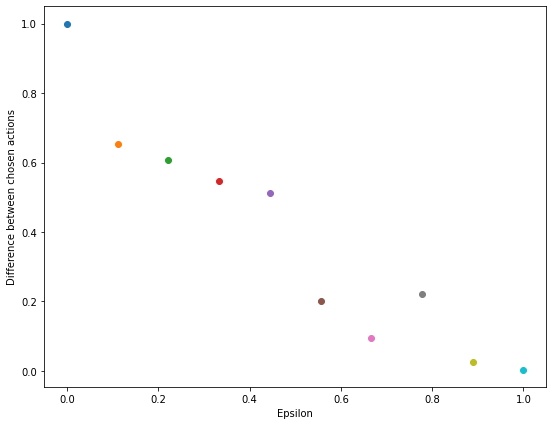

In [ ]:
import matplotlib.pyplot as plt

epsilons=np.linspace(start=0,stop=1,num=10,endpoint=True)
total_results=epsilon_greedy(arms=2,epsilons=epsilons)
plt.figure(figsize=(9,7))
for i in range(len(total_results)):
  temp=total_results[i][:,0]
  plt.plot(epsilons[i],(abs(sum(temp==0)-sum(temp==1)))/len(total_results[0]),'o')
plt.xlabel('Epsilon')
plt.ylabel('Difference between chosen actions')

As is evident from the above plot, as epsilon increases the difference between the chosen actions (1 and 2 reduces). An epsilon of 0 is synonymous to the always greedy strategy (exploitatory) where only only option is almost always chosen while an epsilon of one is synonymous to the always random strategy (exploratory) where there is an equal probability of choosing both actions.

#### Decaying epsilon-Greedy strategy

In [ ]:
import numpy as np

def decay_epsilon_greedy(arms,epsilon=1,maxEpisodes=1000,alpha=0.7,beta=0.7,mu=0.0,sigma=1.0,decay='exponential',decay_rate=0.05, plot=False):

  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)

  elif arms==10:
    env=ten_armed_bandit(mu=mu,sigma=sigma)

  env.seed()
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  e = 0
  Q_est=[]
  results=[]
  epsilons=[]

  while e<maxEpisodes:
      if decay=='linear':
        epsilon-=decay_rate
      elif decay=='exponential':
        epsilon=(1-decay_rate)**e
      epsilons.append(epsilon)

      if epsilon<0:
        break

      if np.random.uniform()>epsilon:
        a=np.argmax(Q)
      else:
        if arms==2:
          a = np.random.choice([0,1])
        elif arms==10:
          a=np.random.choice(np.arange(0,10))
      s_, R, done, info = env.step(a)
      N[a] = N[a]+1
      Q[a] = Q[a]+ ((R-Q[a])/N[a])
      Q_est.append(Q)
      results.append([a,s_,R])
      e = e + 1
      if done:
        env.reset() 
      if len(epsilons)>1:
        if epsilons[e-2]-epsilons[e-1]<10*-2:
            break

  if plot==True:
    plt.figure(figsize=(8,6))
    plt.plot(epsilons, label=f'Type={decay}, Rate={decay_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Epsilon')
    plt.legend()

  if arms==10:
      total_results=np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes))
  else:
      total_results=np.hstack((results,Q_est))

  return total_results

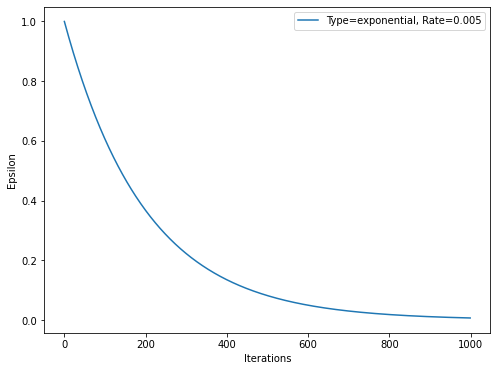

In [ ]:
total_results=decay_epsilon_greedy(arms=2,plot=True, decay_rate=0.005)

#### Softmax

In [ ]:
import numpy as np
def softmax_strategy(arms,temperatures=np.linspace(start=1,stop=0.005,num=1000,endpoint=True),mu=0.0,sigma=1.0,maxEpisodes=1000,alpha=0.7,beta=0.7, plot=False):

  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)
    actions=[0,1]
  elif arms==10:
    env=ten_armed_bandit(mu=mu,sigma=sigma)
    actions=np.arange(0,10)

  env.seed()
  Q = np.zeros(env.action_space.n)
  N = np.zeros(env.action_space.n)
  e = 0
  Q_est=np.zeros((maxEpisodes,env.action_space.n))
  results=[]
  softmaxs=[]

  while e < maxEpisodes:
        temperature=temperatures[e]
        softmax=  np.exp(Q/temperature)/sum(np.exp(Q/temperature))
        a=np.random.choice(actions,p=softmax)
        s_, R, done, info = env.step(a)
        N[a] = N[a]+1
        Q[a] = Q[a]+ ((R-Q[a])/N[a])
        Q_est[e] = Q
        results.append([a,s_,R])
        e = e + 1
        if done:
          env.reset()
        softmaxs.append(softmax)

  if arms==10:
      total_results=np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes))
  else:
      total_results=np.hstack((results,Q_est))      

  softmaxs=np.array(softmaxs)

  if plot==True:
    plt.figure(figsize=(8,6))
    plt.plot(temperatures,(softmaxs[:,0]-softmaxs[:,1])**2)
    plt.xlabel('Temperature')
    plt.ylabel('Difference between chosen actions')

  return total_results

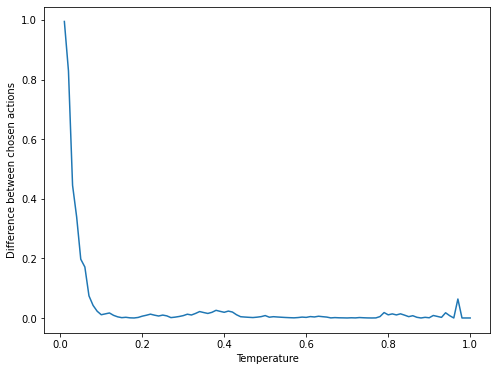

In [ ]:
temperatures=np.linspace(start=1,stop=0.01,num=100,endpoint=True)
results=softmax_strategy(arms=2,temperatures=temperatures,maxEpisodes=100,plot=True)

As evidenced by the above plot, there is an exponential derease in difference between actions chosen as temperature increases. For small values of temperature, difference between Softmax probabilities is large. For large values of temperature, difference between softmax probabilities is small

#### UCB

In [ ]:
import numpy as np

def UCB(arms,c_s=[0.5],mu=0.0,sigma=1.0,maxEpisodes=100,alpha=0.7,beta=0.7):
  
  if arms==2:
    env=two_armed_bandit(alpha=alpha,beta=beta)
  elif arms==10:
    env=ten_armed_bandit(mu=mu,sigma=sigma)
  total_results=[]
  env.seed()
  
  for c in c_s:
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est=np.zeros((maxEpisodes,env.action_space.n))
    results=[]
    while e < maxEpisodes:
        if e<len(Q):
          a=e
        else:
          U=c*np.sqrt(np.log(e)/N)
          a=np.argmax(Q+U)
        s_, R, done, info = env.step(a)
        N[a] = N[a]+1
        Q[a] = Q[a]+((R-Q[a])/N[a])
        Q_est[e] = Q
        results.append([a,s_,R])
        e = e + 1
        if done:
          env.reset()
    if arms==10:
      total_results.append(np.hstack((results,Q_est,[env.reward_dist]*maxEpisodes)))
    else:
      total_results.append(np.hstack((results,Q_est)))

  if len(c_s)==1:
    total_results=total_results[0]

  return np.array(total_results)

Text(0, 0.5, 'Difference between chosen actions')

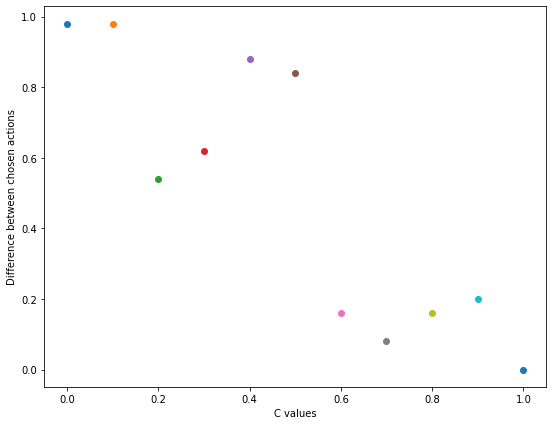

In [ ]:
import matplotlib.pyplot as plt

c_s=np.linspace(0,1,num=11, endpoint=True)
total_results=UCB(arms=2,c_s=c_s)
plt.figure(figsize=(9,7))
for i in range(len(total_results)):
  temp=total_results[i][:,0]
  plt.plot(c_s[i],(abs(sum(temp==0)-sum(temp==1)))/len(total_results[0]),'o')
plt.xlabel('C values')
plt.ylabel('Difference between chosen actions')

When there is no uncertainty added to the Q value, the argmax is always chosen and the action selection mimics the always greedy option. As uncertainty is increasingly added, both actions are chosen with greater frequency and the function approaches the always random paradigm  

### Comparing strategies

#### Two armed bandit comparison

(0.0, 1.0)

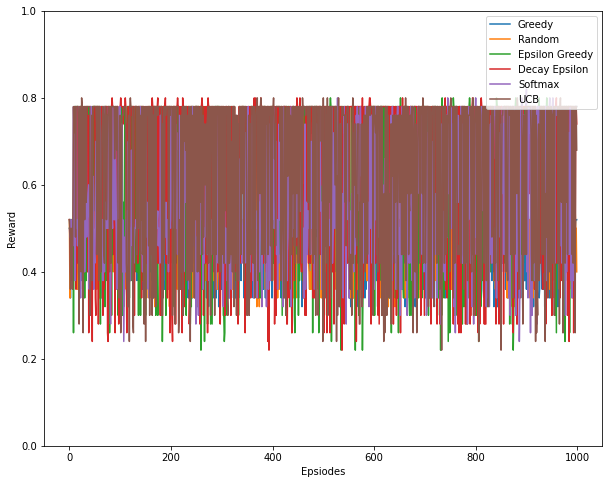

In [ ]:
alphas=np.random.uniform(0,1,size=50)
betas=np.random.uniform(0,1,size=50)
greedy_results, random_results, epsilon_greedy_results, decay_epsilon_results, softmax_results,UCB_results = ([] for i in range(6))
for i in range(len(alphas)):
    greedy_results.append(greedy_strategy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
    random_results.append(random_strategy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
    epsilon_greedy_results.append(epsilon_greedy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
    decay_epsilon_results.append(decay_epsilon_greedy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
    softmax_results.append(softmax_strategy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
    UCB_results.append(UCB(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000))
two_armed_results=[greedy_results,random_results,epsilon_greedy_results,decay_epsilon_results,softmax_results,UCB_results]

plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']
for i in range(len(two_armed_results)):
  plt.plot(np.arange(1000),np.mean(two_armed_results[i],axis=0)[:,2], label=names[i])

plt.legend(loc='upper right')
plt.xlabel('Epsiodes')
plt.ylabel('Reward')
plt.ylim([0,1])

##### Hyper-parameter tuning

(0.0, 1.0)

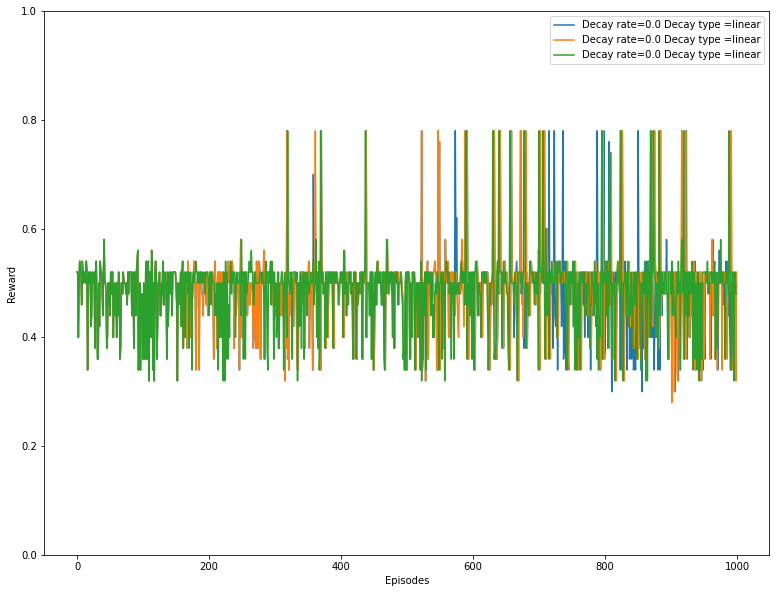

In [ ]:
alphas=np.random.uniform(0,1,size=50)
betas=np.random.uniform(0,1,size=50)
total_results=[]
#c_s=np.geomspace(start=0.1,stop=100,num=5, endpoint=False)
decay_rate=np.linspace(0.0001,0.00005,num=3, endpoint=False)
decay_type=['linear']
plt.figure(figsize=(13,10))

for rate in decay_rate:
  for decType in decay_type:
    strategy_results= []
    for i in range(len(alphas)):
      strategy_results.append(decay_epsilon_greedy(arms=2,alpha=alphas[i],beta=betas[i],maxEpisodes=1000,decay_rate=rate, decay=decType))
    plt.plot(np.arange(1000),np.mean(strategy_results,axis=0)[:,2], label=f'Decay rate={round(rate,3)} Decay type ={decType}')

plt.legend(loc='upper right')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.ylim([0,1])

#### Ten armed bandit comparison

In [ ]:
mus=np.random.uniform(0,1,size=50)
greedy_results, random_results, epsilon_greedy_results, decay_epsilon_results, softmax_results,UCB_results = ([] for i in range(6))
optimal_actions=[]

for i in range(len(mus)):
  greedy_results.append(greedy_strategy(arms=10,mu=mus[i],maxEpisodes=1000))
  random_results.append(random_strategy(arms=10,mu=mus[i],maxEpisodes=1000))
  epsilon_greedy_results.append(epsilon_greedy(arms=10,mu=mus[i],maxEpisodes=1000))
  decay_epsilon_results.append(decay_epsilon_greedy(arms=10,mu=mus[i],maxEpisodes=1000))
  softmax_results.append(softmax_strategy(arms=10,mu=mus[i],maxEpisodes=1000))
  UCB_results.append(UCB(arms=10,mu=mus[i],maxEpisodes=1000))
  #results_list.append([results1[:,2],results2[:,2],results3[:,2],results4[:,2],results5[:,2],results6[:,2]])
ten_armed_results=[greedy_results,random_results,epsilon_greedy_results,decay_epsilon_results,softmax_results,UCB_results]

Text(0, 0.5, 'Reward')

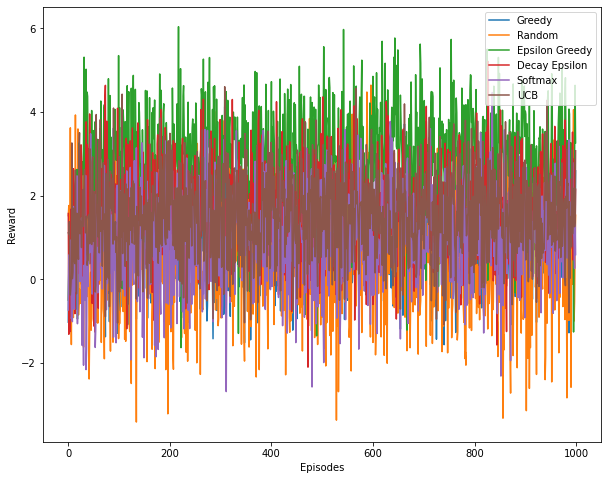

In [ ]:
plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']
for i in range(len(ten_armed_results)):
    plt.plot(np.arange(1000),np.mean(ten_armed_results[i],axis=0)[:,2], label=names[i])
plt.legend(loc='upper right')
plt.xlabel('Episodes')
plt.ylabel('Reward')

In [ ]:
mus

array([0.66222663, 0.19591212, 0.0361948 , 0.87614122, 0.5153978 ,
       0.03630033, 0.52447228, 0.18095247, 0.76337228, 0.51241942,
       0.77236872, 0.56772826, 0.0360072 , 0.23922614, 0.95351221,
       0.1622063 , 0.77319626, 0.03722349, 0.26599721, 0.00941974,
       0.8679402 , 0.1205254 , 0.50385285, 0.08609814, 0.46497075,
       0.9568295 , 0.54522058, 0.1211234 , 0.89790223, 0.05055027,
       0.90697382, 0.42873311, 0.40640575, 0.76834406, 0.47375092,
       0.81741927, 0.20304699, 0.08274335, 0.56732047, 0.40808253,
       0.53652813, 0.78251042, 0.53957628, 0.62191418, 0.04084702,
       0.86067441, 0.21787194, 0.25609105, 0.60616868, 0.36846659])

### Regret

#### Two-armed regret

In [ ]:
optimal_v=np.zeros(shape=(len(betas),2))
optimal_v[:,0]=alphas
optimal_v[:,1]=betas

(0.0, 0.5)

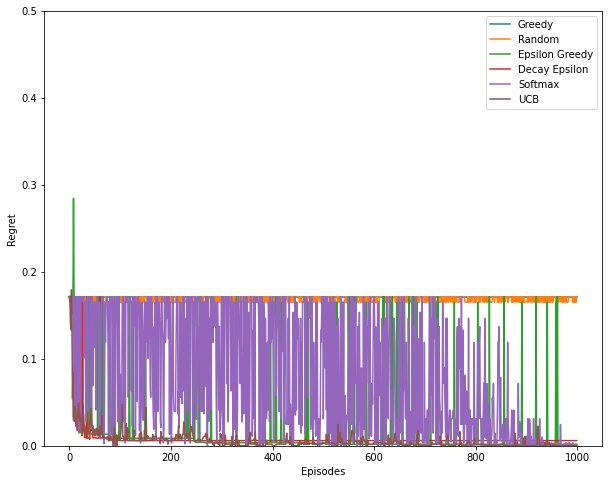

In [ ]:
plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']
for j in range(len(two_armed_results)):
  total_regret=np.zeros(shape=(1000,len(optimal_v)))
  for i in range(len(optimal_v)):
    actions=two_armed_results[j][i][:,0]
    q_action_taken=(np.column_stack((1-actions,actions))*optimal_v[i]).sum(axis=1)
    regret=max(optimal_v[i])-q_action_taken #difference between optimal and action's q values
    total_regret[:,i]=regret
  plt.plot(np.arange(1000),np.mean(total_regret,axis=1),label=names[j])
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Regret')
plt.ylim(0,0.5)

#### Ten-armed regret

(0.0, 5.0)

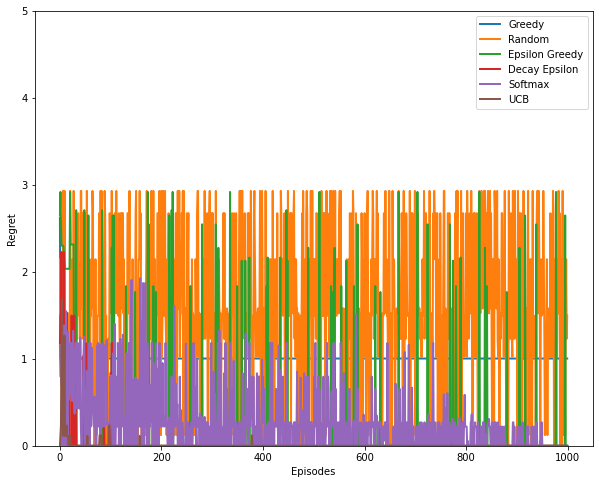

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.arange(0,10))

plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']
for j in range(len(ten_armed_results)):
  total_regret=np.zeros(shape=(1000,len(mus)))
  for i in range(len(mus)):
    actions=lb.transform(ten_armed_results[j][i][:,0])
    actual_q_vals=ten_armed_results[j][i][:,-10:][0]
    q_action_taken=(actions*actual_q_vals).sum(axis=1)
    regret=max(actual_q_vals)-q_action_taken #difference between optimal and actual q values
    total_regret[:,i]=regret
  if i==0:
    linewidth=8
  else:
    linewidth=2
  plt.plot(np.arange(1000),np.mean(total_regret,axis=1),label=names[j], linewidth=linewidth)
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Regret')
plt.ylim(0,5)

### Percentage optimal action

#### Two Armed bandit

In [ ]:
optimal_actions=np.argmax(optimal_v,axis=1)

Text(0, 0.5, 'Optimal action selection (%)')

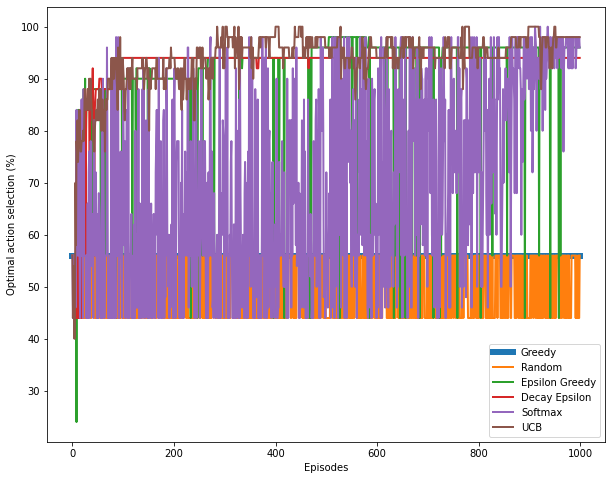

In [ ]:
plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']

for i in range(len(two_armed_results)): 
  total_accuracy=np.zeros(shape=(1000,len(two_armed_results[i])))
  for j in range(len(two_armed_results[i])):
      total_accuracy[:,j]=two_armed_results[i][j][:,0]==optimal_actions[j]
  if i==0:
    linewidth=6
  else:
    linewidth=2
  plt.plot(np.arange(1000),np.mean(total_accuracy,axis=1)*100,label=names[i], linewidth=linewidth)
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Optimal action selection (%)')

#### Ten Armed bandit

In [ ]:
plt.figure(figsize=(10,8))
names=['Greedy','Random','Epsilon Greedy','Decay Epsilon','Softmax','UCB']

for i in range(len(two_armed_results)): 
  total_accuracy=np.zeros(shape=(1000,len(two_armed_results[i])))
  for j in range(len(two_armed_results[i])):
      total_accuracy[:,j]=two_armed_results[i][j][:,0]==optimal_actions[j]
  plt.plot(np.arange(1000),np.mean(total_accuracy,axis=1),label=names[i])
plt.legend()

Text(0, 0.5, 'Optimal action selection (%)')

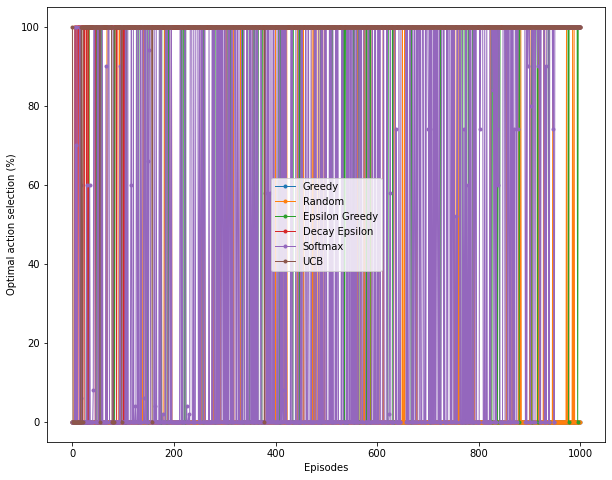

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(ten_armed_results)):
  total_accuracy=np.zeros(shape=(1000,len(ten_armed_results[i])))
  for j in range(len(ten_armed_results[i])):
    optimal_action=np.argmax(ten_armed_results[i][j][:,-10:][0])
    total_accuracy[:,j]=(ten_armed_results[i][j][:,0]==optimal_action)
  plt.plot(np.arange(1000),np.mean(total_accuracy,axis=1)*100, '.-',label=names[i], linewidth=1, )

plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Optimal action selection (%)')

## Problem 2: Monte Carlo Estimates and TD Learning

### Random walk environment

In [ ]:
import gym
from gym import spaces
import numpy as np

class RWE(gym.Env):

  def __init__(self):
    self.action_space = spaces.Discrete(2)
    self.observation_space = spaces.Discrete(7)
    self.state=3
    self.reward=0

  def step(self, action):
    
    self.reward=0
    done=False
    self.action=action
    #with probability 1/2 reach state-1, with probability 1/2 reach state+1
    val=np.random.choice([-1,1])
    self.state+=val

    if self.state>6:
      print(f'Error, state={self.state},val={val}')

    if self.state==6:
      self.reward=1
      done=True
    elif self.state==0:
      done=True

    info = {}
    return self.state, self.reward, done, info
    
  def reset(self):
    # Reset the state of the environment to an initial state
    self.state = 3
    self.reward=0
    return self.state

  def seed(self,seed=31):
    self.seed=np.random.seed(seed)

  def render(self, mode='human', close=False):
    # Render the environment to the screen
    print(f'Current state={self.state} Reward={self.reward} Action={self.action}')

In [ ]:
def generateTrajectory(env, policy=0, maxSteps=50):

  s=env.reset()
  experiences=[]

  for e in range(maxSteps):
      a=policy    
      s_, r, done, info = env.step(a)
      experiences.append([s,a,r,s_])
      if done:
        s=env.reset()
        return experiences
      s=s_
  return []

In [ ]:
env=RWE()
generateTrajectory(env, policy=np.random.choice([0,1]), maxSteps=10)

[]

In [ ]:
def decayAlpha(initialValue, finalValue, maxSteps, decayType):
  if decayType=='linear':
    alpha=np.linspace(start=initialValue,stop=finalValue,num=maxSteps, endpoint=True)
  elif decayType=='exponential':
    alpha=np.geomspace(start=initialValue, stop=finalValue, num=maxSteps, endpoint=True)
  return alpha

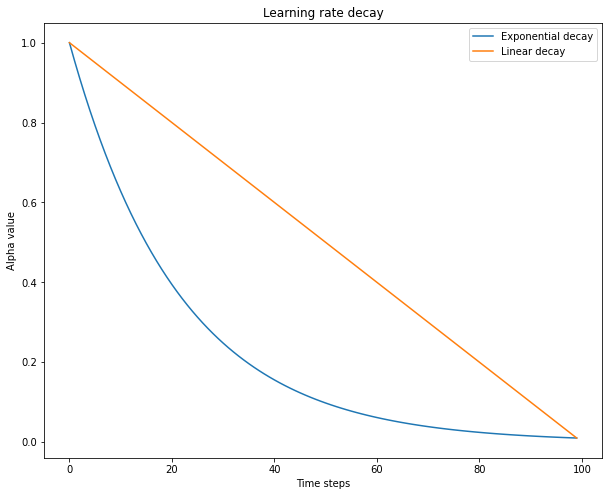

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alpha1=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=100, decayType='exponential')
alpha2=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=100, decayType='linear')
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(alpha1)),alpha1,label='Exponential decay')
plt.plot(np.arange(len(alpha2)),alpha2,label='Linear decay')
plt.xlabel('Time steps')
plt.ylabel('Alpha value')
plt.title('Learning rate decay')
plt.legend()
plt.show()

### Monte Carlo

In [ ]:
def MonteCarloPrediction(env,policy,alphas,gamma=0.99,noEpisodes=500,maxSteps=50, firstVisit=True):

  Gs=[[] for _ in range(env.observation_space.n)]
  v=[0]*env.observation_space.n
  v_r=np.zeros((noEpisodes,len(v)))
  for e in range(noEpisodes):
      t=generateTrajectory(env, policy=policy, maxSteps=maxSteps)
      alpha=alphas[e]
      visited=[0]*env.observation_space.n
      for i , (s,a,r,s_) in enumerate(t):
          if firstVisit and visited[s]:
              continue
          G=0
          for j in range(i,len(t)): 
              G+= (gamma**(j-i)) * (t[j][2])
          Gs[s].append(G) 
          v[s] += alpha * (G-v[s])
          visited[s]=1
      v_r[e]=v

  return v,v_r,Gs

In [ ]:
noEpisodes=500
gammas=[0.5,0.9,0.99]
v_s=[]
decayTypes=['linear','exponential']
for decay in decayTypes:
  for g in gammas:
    alphas=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=noEpisodes, decayType=decay)
    env=RWE()
    env.seed(39)

    v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,gamma=g,noEpisodes=noEpisodes,maxSteps=10, firstVisit=True)
    v_s.append(v)

gammas=gammas*2
decayTypes=[decayTypes[0]]*3+[decayTypes[1]]*3
v_s=np.array(v_s)

(0.0, 1.0)

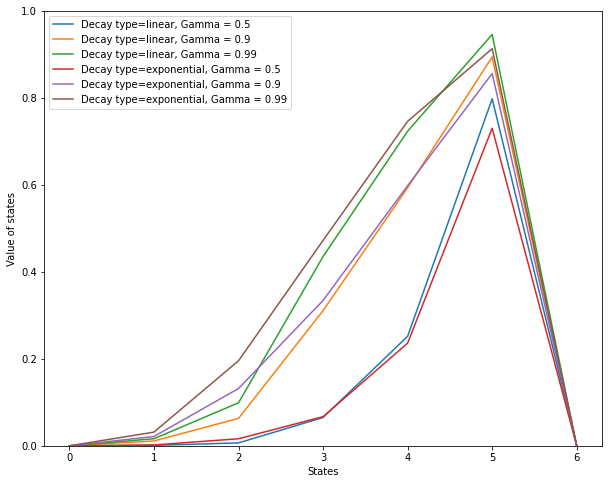

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(v_s)):
  plt.plot(v_s[i],label=f'Decay type={decayTypes[i]}, Gamma = {gammas[i]}')
plt.legend()
plt.xlabel('States')
plt.ylabel('Value of states')
plt.ylim(0,1)

Text(0, 0.5, 'Value of states')

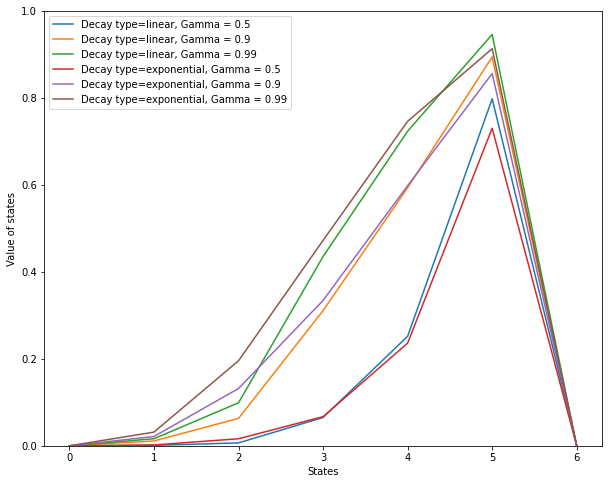

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(v_s)):
  plt.plot(v_s[i],label=f'Decay type={decayTypes[i]}, Gamma = {gammas[i]}')
plt.legend()
plt.ylim([0,1])
plt.xlabel('States')
plt.ylabel('Value of states')

### Temporal Difference Learning

In [ ]:
def TemporalDifferencePrediction(env,policy,alphas,gamma=0.99,noEpisodes=500):

  v=[0]*env.observation_space.n
  v_r=np.zeros((noEpisodes,len(v)))
  td_targets=[[] for _ in range(env.observation_space.n)]

  for e in range(noEpisodes):
      alpha=alphas[e]
      s=env.reset()
      done=False
      
      while (not done):
          a=policy    
          s_, r, done, info = env.step(a)
          td_target = r  
          if not done:
              td_target += (gamma* v[s_]) 
          td_targets[s].append(td_target)
          td_error = td_target-v[s]
          v[s] += alpha * td_error
          s=s_
      v_r[e]=v

  return v,v_r,td_targets

Text(0, 0.5, 'Value of states')

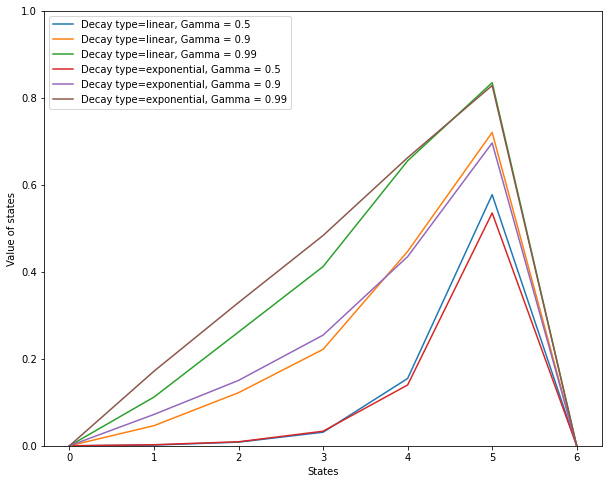

In [ ]:
noEpisodes=500
gammas=[0.5,0.9,0.99]
v_s=[]
decayTypes=['linear','exponential']
for decay in decayTypes:
  for g in gammas:
    alphas=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=noEpisodes, decayType=decay)
    env=RWE()
    env.seed(33)

    v,v_r,Gs=TemporalDifferencePrediction(env=env,policy=0,alphas=alphas,gamma=g,noEpisodes=noEpisodes)
    v_s.append(v)

gammas=gammas*2
decayTypes=[decayTypes[0]]*3+[decayTypes[1]]*3
v_s=np.array(v_s)

plt.figure(figsize=(10,8))
for i in range(len(v_s)):
  plt.plot(v_s[i],label=f'Decay type={decayTypes[i]}, Gamma = {gammas[i]}')
plt.legend()
plt.ylim([0,1])
plt.xlabel('States')
plt.ylabel('Value of states')

### MC-FVMC Estimation

In [ ]:
import numpy as np

transition_prob={}
for i in range(1,6):
  for j in range(2):
    transition_prob[(i,j,i+1)]=0.5
    transition_prob[(i,j,i-1)]=0.5

R=np.array([0]*7)  #rewards
R[6]=1

In [ ]:
import copy

V=[0,0,0,0,0,0,0]
gamma=0.99
for i in range(500):
    old_V = copy.deepcopy(V)
    for s in range(7):    
        val = np.array([0.0]*2)
        for a in range(2):
            temp = 0
            for j in range(7):
                if((s,a,j) in transition_prob):
                    temp+= transition_prob[s,a,j]*(R[j] + gamma*old_V[j])
            val[a] = temp     
        V[s] = max(val)
    
    if V==old_V:
        break
print(f'TrueValues={V}')

TrueValues=[0.0, 0.15008430770238204, 0.30320062162097383, 0.4624422006228177, 0.6310260463039103, 0.8123578929204356, 0.0]


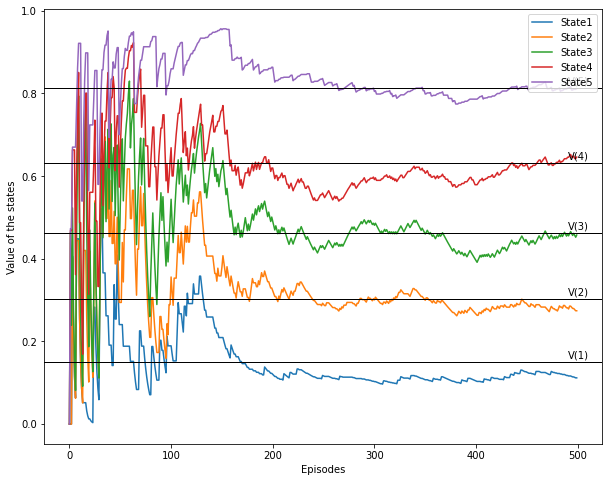

In [ ]:
noEpisodes=500
alphas=np.append(decayAlpha(initialValue=0.5, finalValue=0.01, maxSteps=int(noEpisodes/2), decayType='exponential'),[0.01]*int(noEpisodes/2))
env=RWE()
env.seed(50)
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes,firstVisit=True)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(v_r.shape[0]-10,trueValue+0.01,f'V({i})')

plt.legend(loc='upper right')
plt.xlabel('Episodes')
plt.ylabel('Value of the states')
plt.show()

### MC-EVMC Estimation

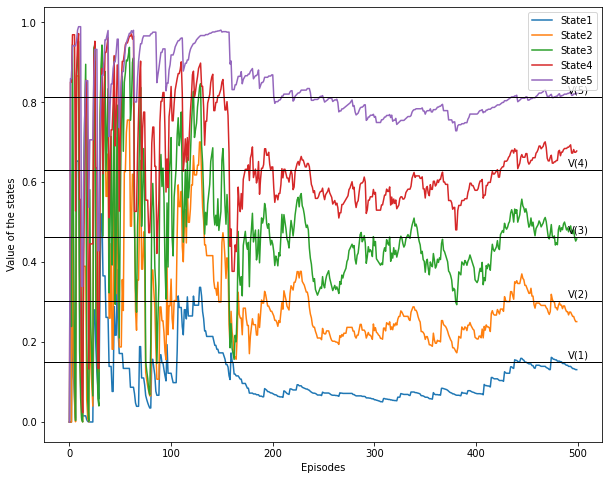

In [ ]:
noEpisodes=500
alphas=np.append(decayAlpha(initialValue=0.5, finalValue=0.01, maxSteps=int(noEpisodes/2), decayType='exponential'),[0.01]*int(noEpisodes/2))
env=RWE()
env.seed(50)
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes,firstVisit=False)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')
plt.legend(loc='upper right')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(490,trueValue+0.01,f'V({i})')

plt.xlabel('Episodes')
plt.ylabel('Value of the states')
plt.show()


### TD Estimation

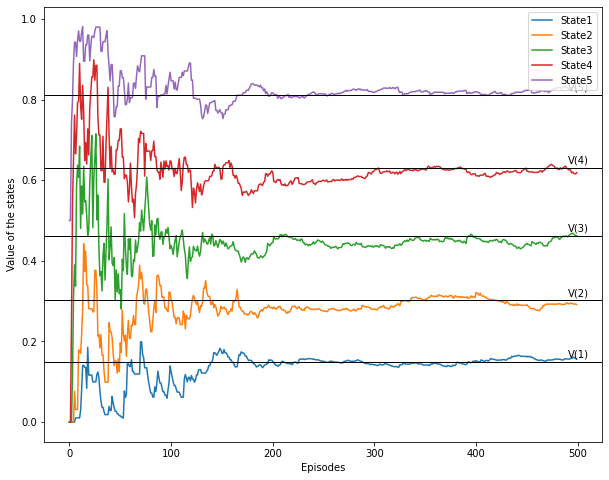

In [ ]:
noEpisodes=500
alphas=np.append(decayAlpha(initialValue=0.5, finalValue=0.01, maxSteps=250, decayType='exponential'),[0.01]*250)
env=RWE()
env.seed(38)
v,v_r,td_targets=TemporalDifferencePrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(490,trueValue+0.01,f'V({i})')

plt.legend(loc='upper right')
plt.xlabel('Episodes')
plt.ylabel('Value of the states')
plt.show()

### Log-scale

#### MC-FVMC

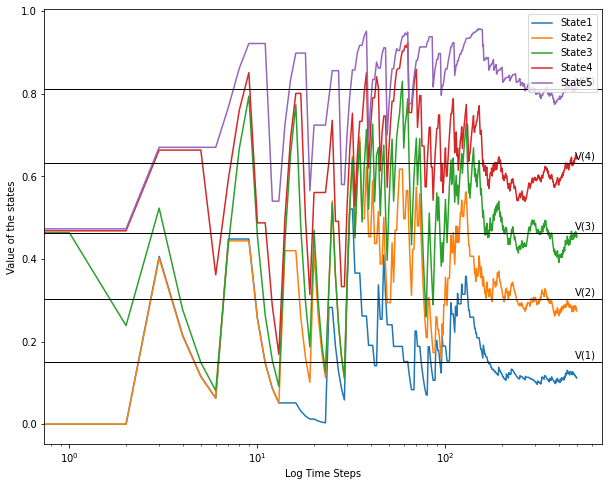

In [ ]:
env=RWE()
env.seed(50)
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes,firstVisit=True)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(490,trueValue+0.01,f'V({i})')

plt.legend(loc='upper right')
plt.xscale('log')
plt.xlabel('Log Time Steps')
plt.ylabel('Value of the states')
plt.show()

#### MC-EVMC

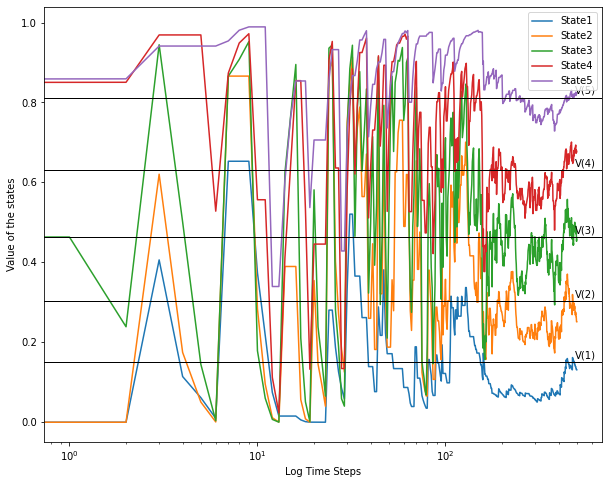

In [ ]:
env=RWE()
env.seed(50)
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes,firstVisit=False)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')
plt.legend(loc='upper right')
plt.xscale('log')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(490,trueValue+0.01,f'V({i})')

plt.xlabel('Log Time Steps')
plt.ylabel('Value of the states')
plt.show()

#### Temporal Difference

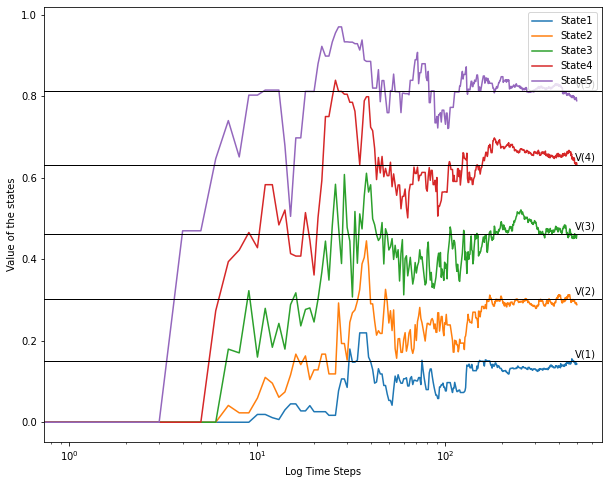

In [ ]:
env=RWE()
env.seed()
v,v_r,td_targets=TemporalDifferencePrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes)

plt.figure(figsize=(10,8))
for i in range(v_r.shape[1]):
  if i==0 or i==v_r.shape[1]-1:
    continue
  plt.plot(np.arange(v_r.shape[0]),v_r[:,i],label=f'State{i}')

plt.legend(loc='upper right')
plt.xscale('log')

for i in range(len(V)):
  trueValue=V[i]
  if trueValue==0:
    continue
  plt.axhline(y=trueValue, color='black', linestyle='-',linewidth=1)
  plt.text(490,trueValue+0.01,f'V({i})')

plt.xlabel('Log Time Steps')
plt.ylabel('Value of the states')
plt.show()

### Target Sequence

#### MC-FVMC

Text(0, 0.5, 'Target value G(t)')

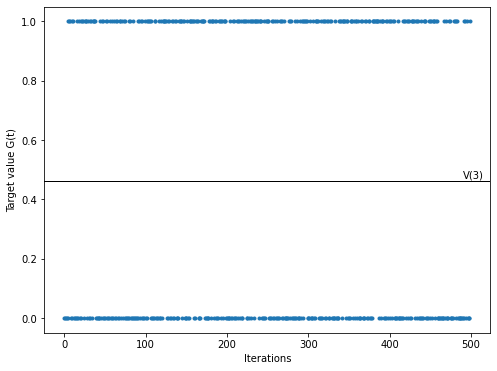

In [ ]:
env=RWE()
env.seed()
noEpisodes=500
alphas=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=noEpisodes, decayType='linear')
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,gamma=1,firstVisit=True)
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(Gs[3])),Gs[3],'.')
plt.axhline(y=V[3], color='black', linestyle='-',linewidth=1)
plt.text(len(Gs[3])-10,V[3]+0.01,f'V({3})')
plt.xlabel('Iterations')
plt.ylabel('Target value G(t)')

#### MC-EVMC

Text(0, 0.5, 'Target value G(t)')

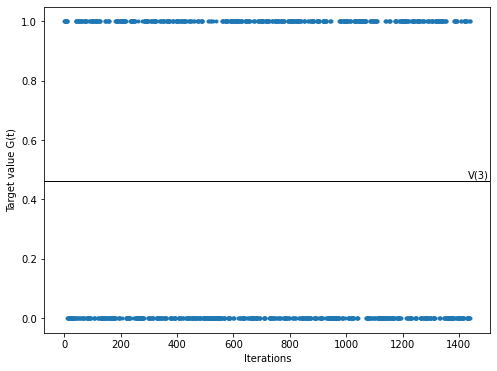

In [ ]:
noEpisodes=500
alphas=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=noEpisodes, decayType='linear')
v,v_r,Gs=MonteCarloPrediction(env=env,policy=0,alphas=alphas,gamma=1,firstVisit=False)
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(Gs[3])),Gs[3],'.')
plt.axhline(y=V[3], color='black', linestyle='-',linewidth=1)
plt.text(len(Gs[3])-10,V[3]+0.01,f'V({3})')
plt.xlabel('Iterations')
plt.ylabel('Target value G(t)')

#### Temporal Difference

Text(0, 0.5, 'Target value (Gt estimate)')

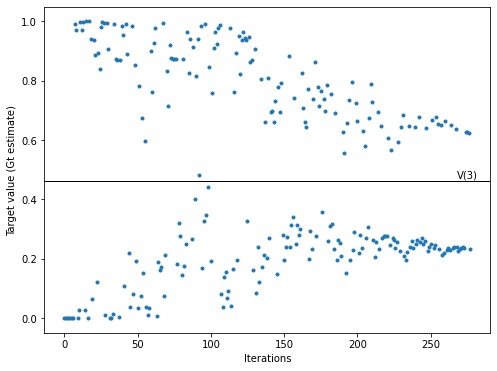

In [ ]:
noEpisodes=100
alphas=decayAlpha(initialValue=1, finalValue=0.01, maxSteps=noEpisodes, decayType='linear')
v,v_r,td_targets=TemporalDifferencePrediction(env=env,policy=0,alphas=alphas,noEpisodes=noEpisodes, gamma=1)
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(td_targets[3])),td_targets[3],'.')
plt.axhline(y=V[3], color='black', linestyle='-',linewidth=1)
plt.text(len(td_targets[3])-10,V[3]+0.01,f'V({3})')
plt.xlabel('Iterations')
plt.ylabel('Target value (Gt estimate)')